# Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
import json
from pandas.io.json import json_normalize

In [2]:
df=pd.read_csv(r'C:\Users\maz\Desktop\kaggle ga\all\train.csv')

C:\Users\maz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_test=pd.read_csv(r'C:\Users\maz\Desktop\kaggle ga\all\test.csv')

C:\Users\maz\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Feature Engineering

JSon column normalization

In [2]:
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
def load_df(csv_path=r'C:\Users\maz\Desktop\kaggle ga\all\train.csv'):

    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'})
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

    return df
df=load_df()

1. Date: converting date into datetime format and making new variable of weekday ane month

In [3]:
df.date=[datetime.datetime.strptime(str(i),'%Y%m%d') for i in list(df.date)]
df['day']=df.date.dt.dayofweek
df['month']=df.date.dt.month
df=df.drop(['date'],axis=1)

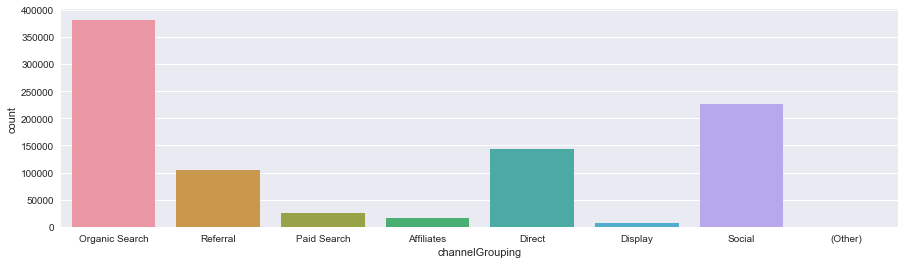

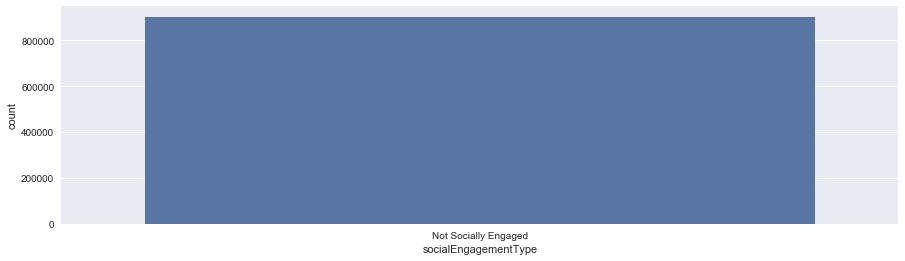

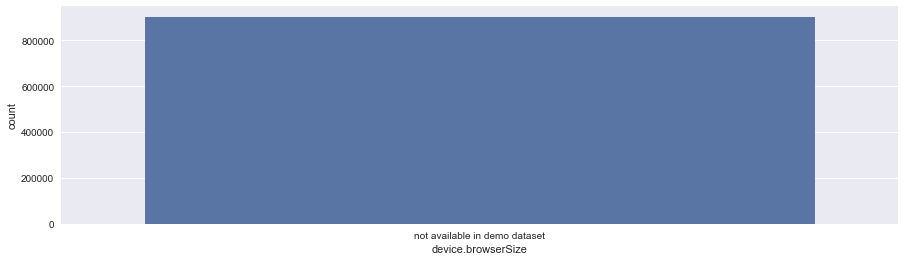

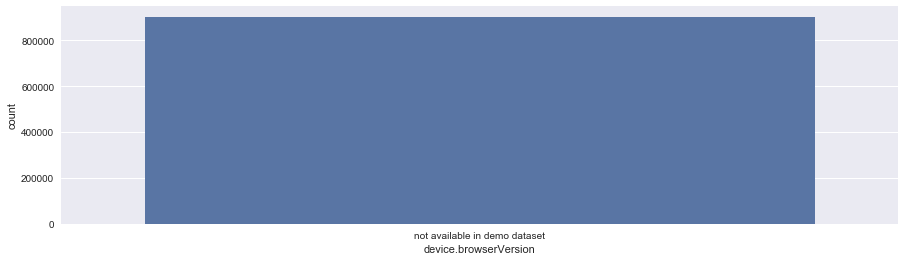

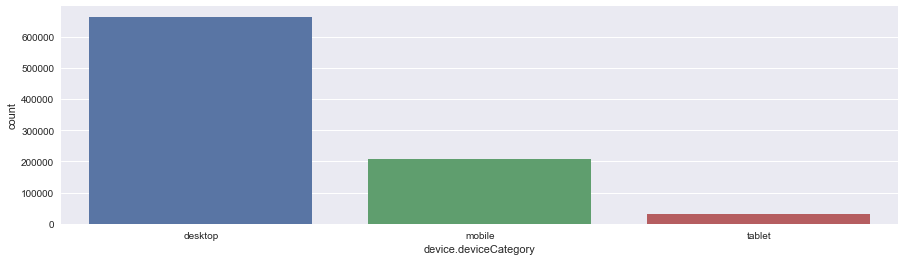

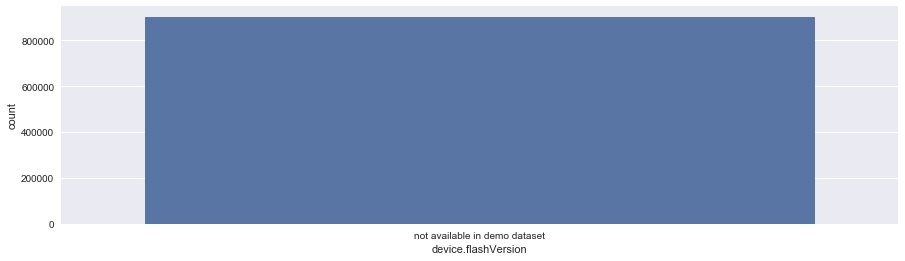

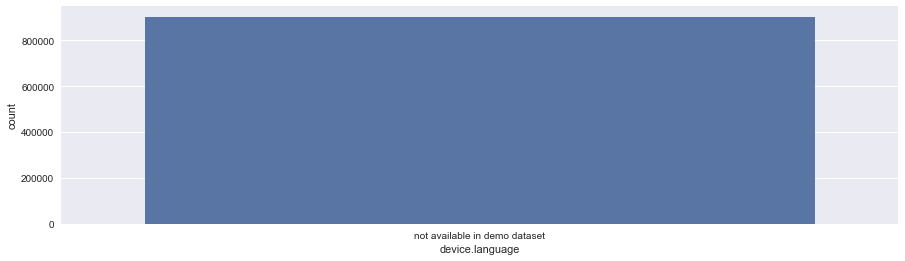

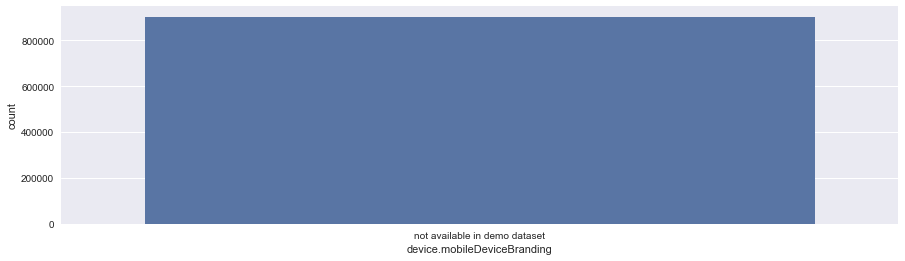

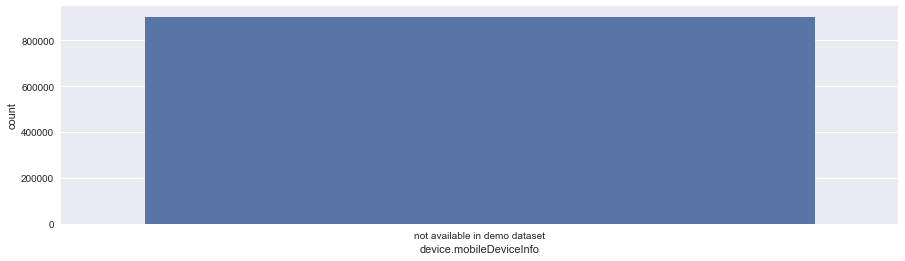

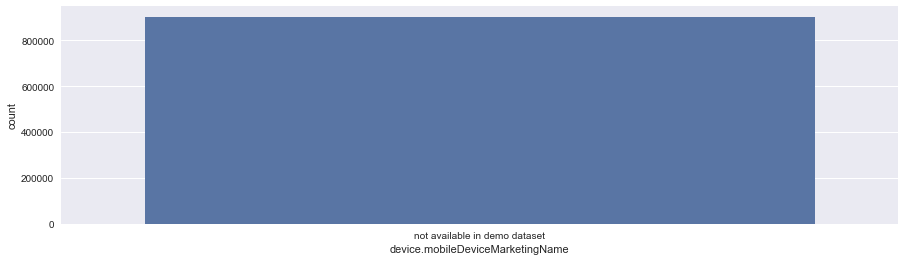

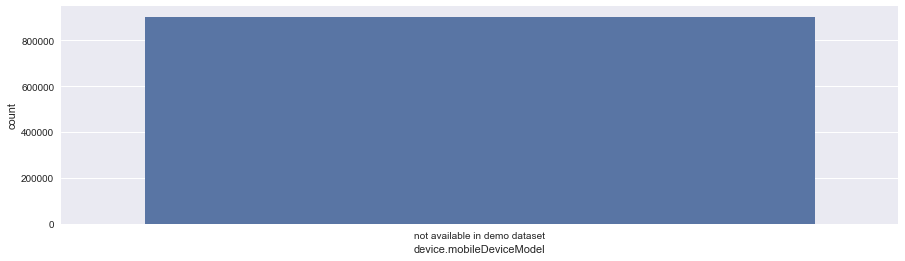

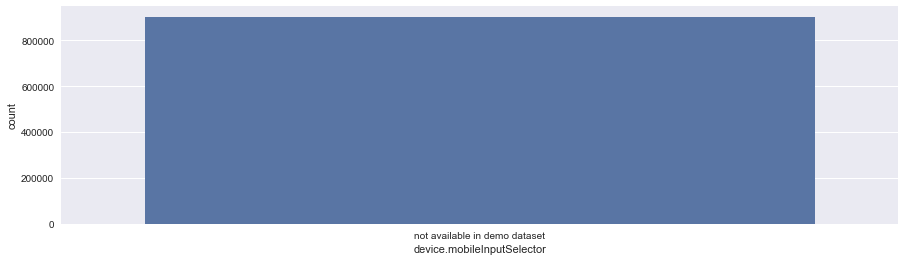

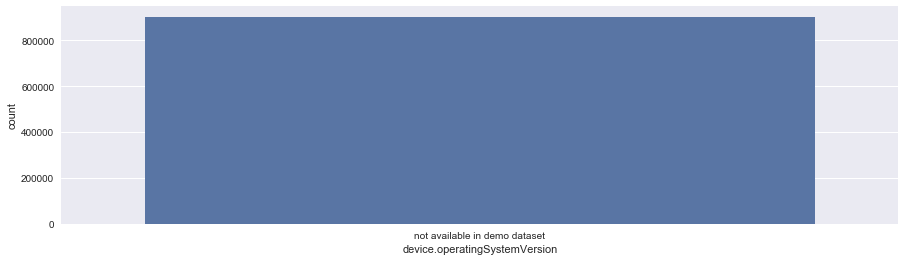

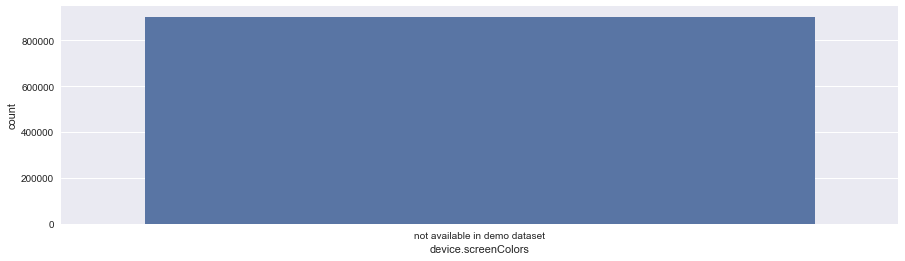

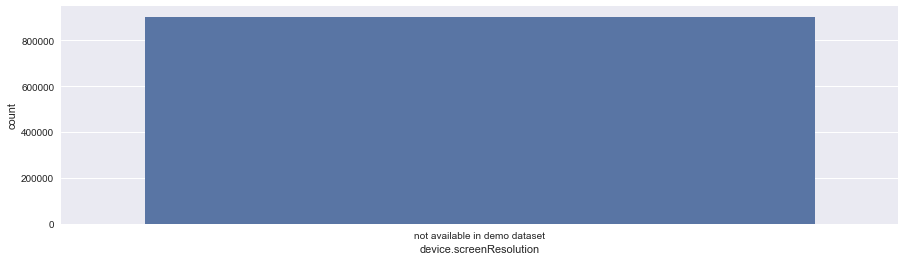

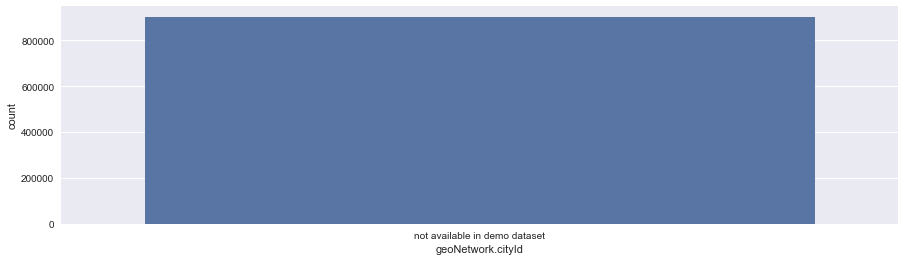

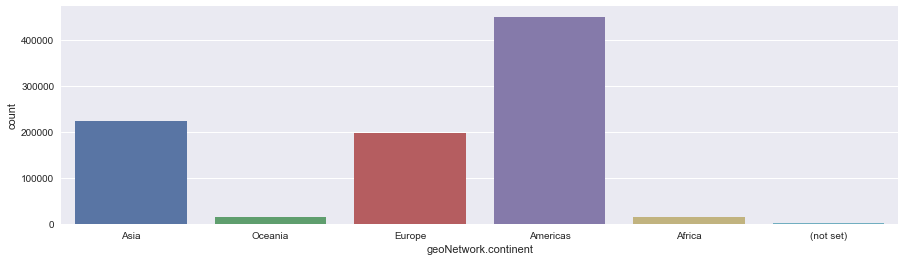

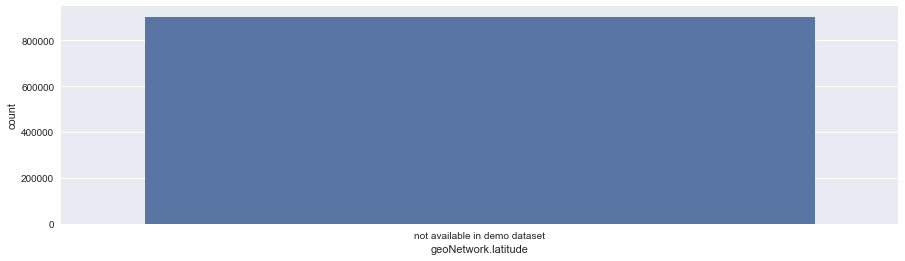

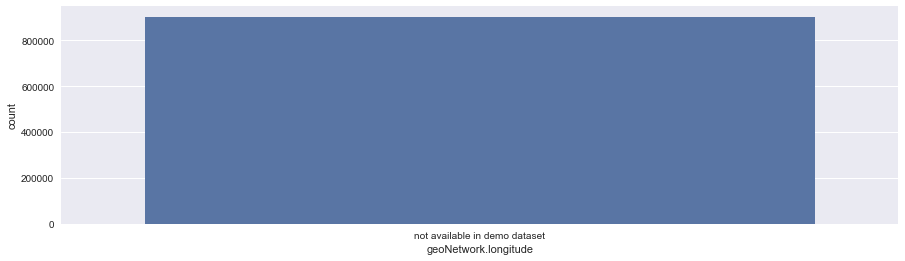

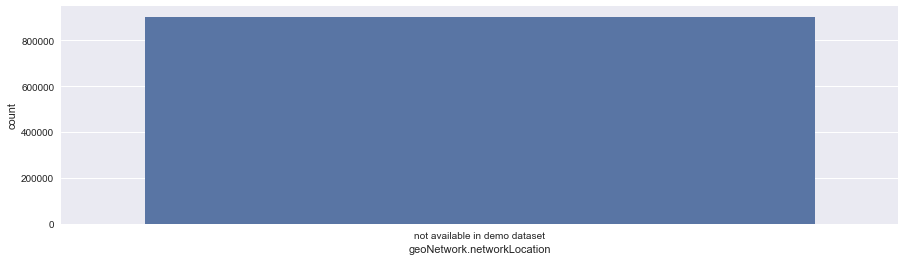

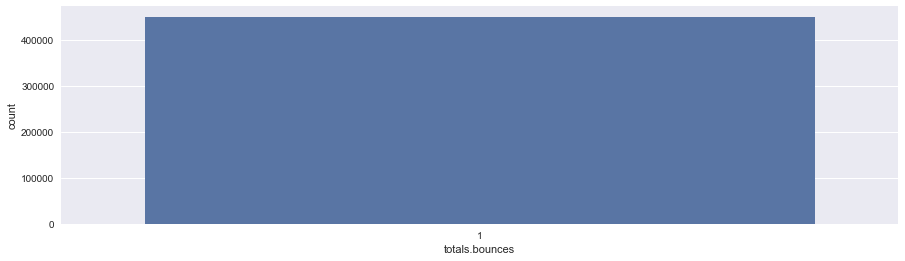

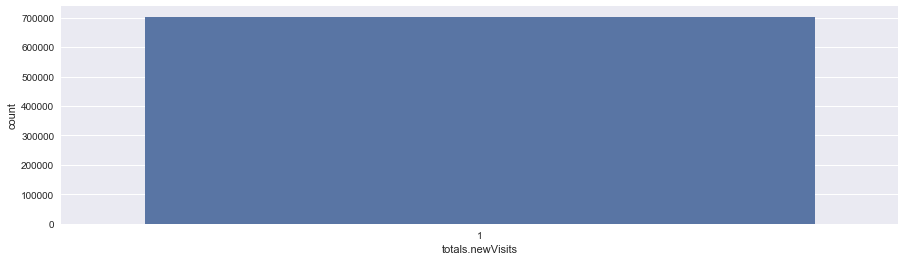

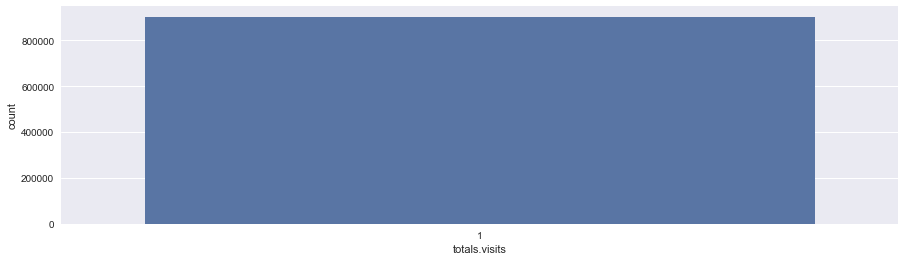

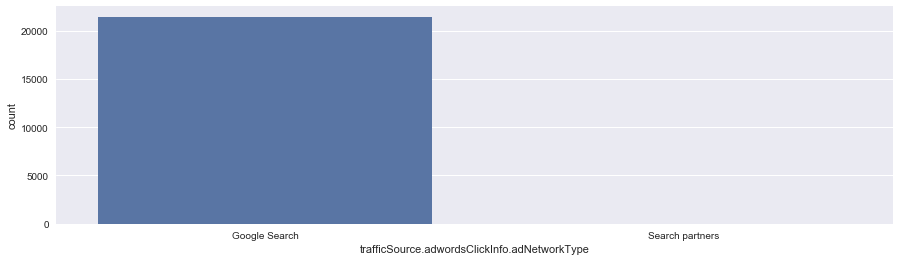

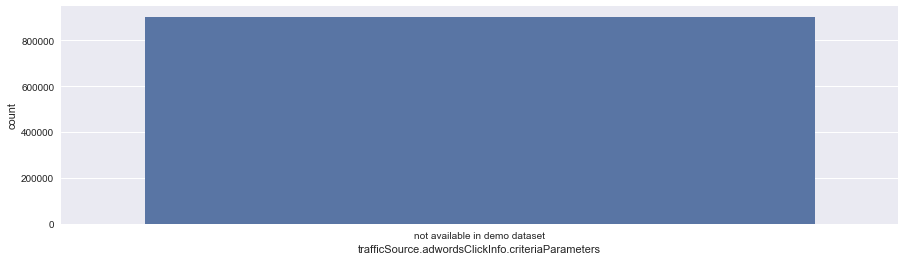

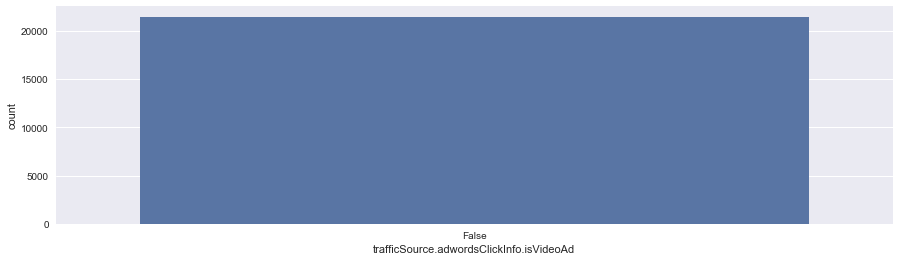

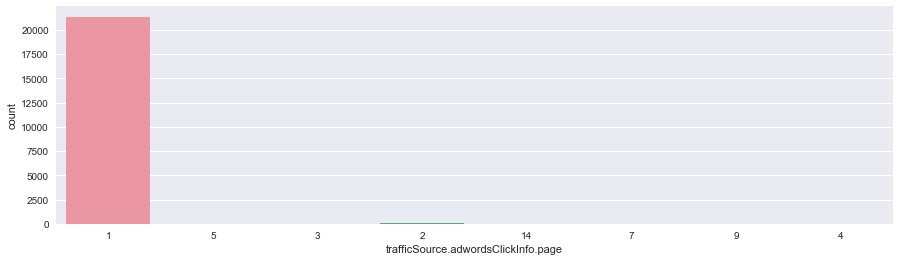

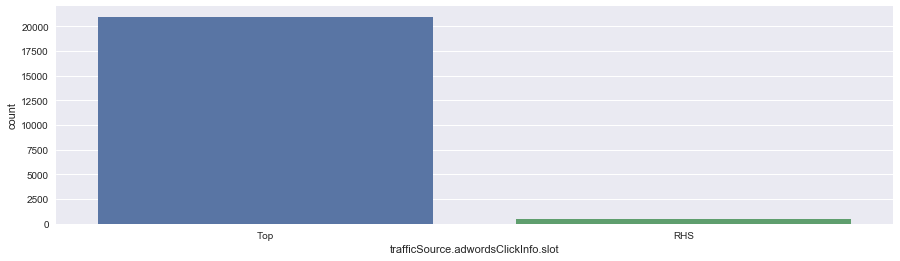

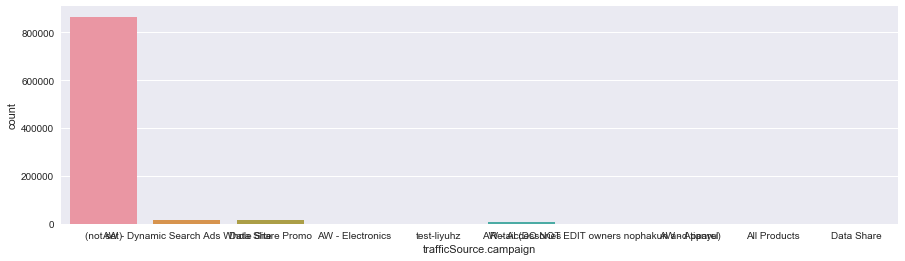

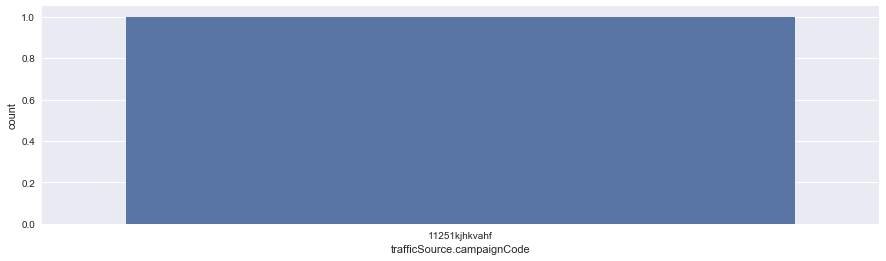

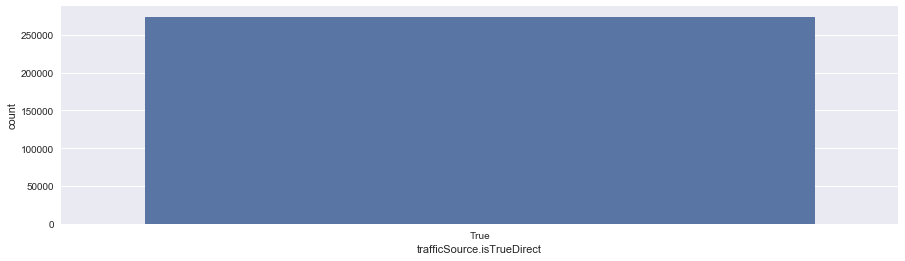

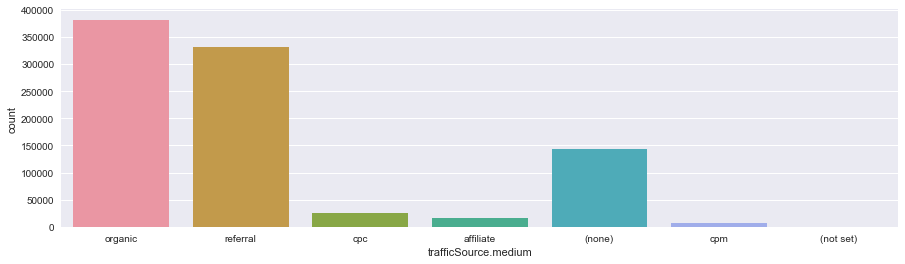

In [11]:
for i in df.columns[df.dtypes == 'O']:
    if df[i].nunique() <= 15:
        plt.figure(figsize=(15,4))
        sns.set(style="darkgrid")
        ax = sns.countplot(x=i, data=df)
        plt.show()

# Dropping Variable with only one unique values

In [89]:
for i in df.columns[df.dtypes == 'O']:
    if df[i].nunique() == 1:
        df=df.drop([i],axis=1)

# Count Plot After dropping non value adding variables

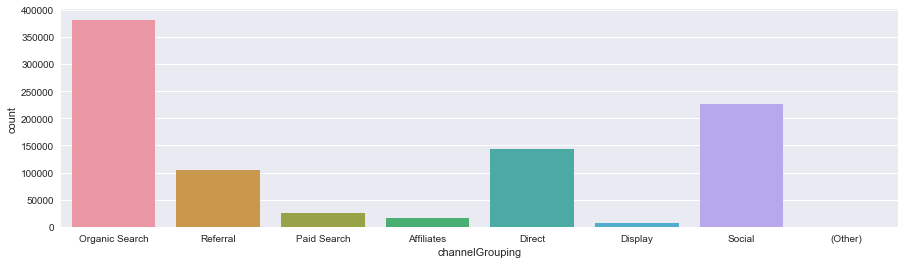

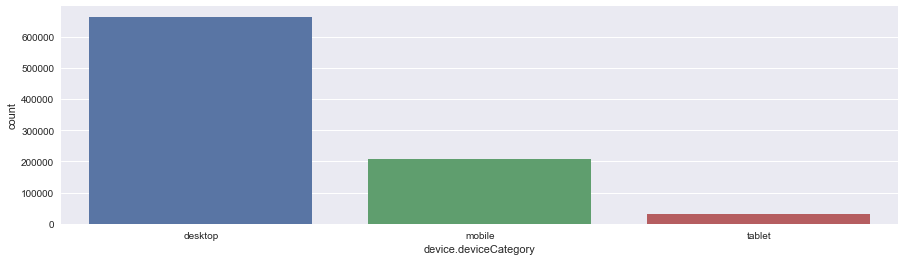

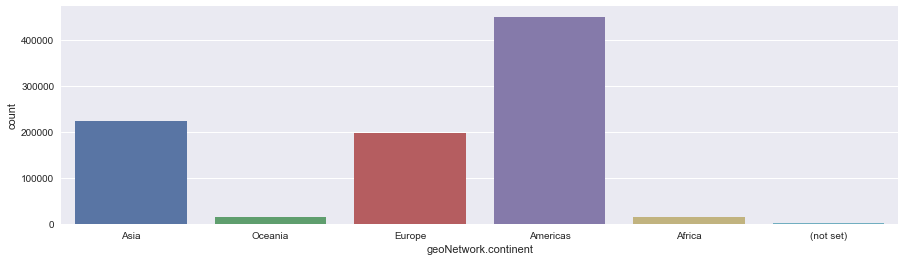

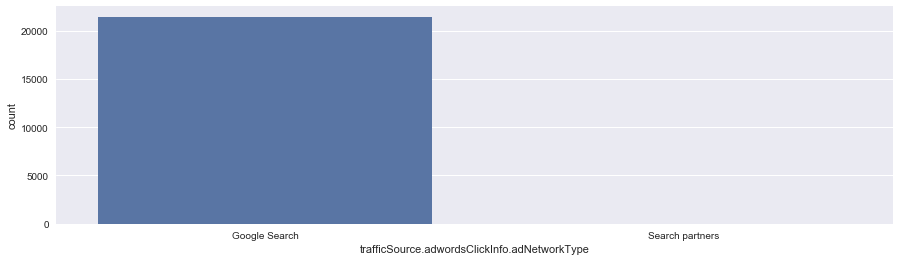

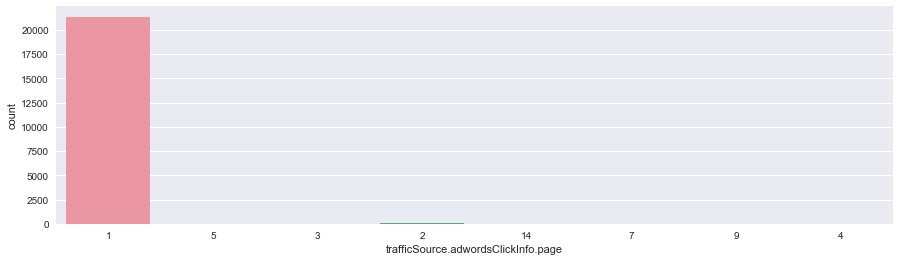

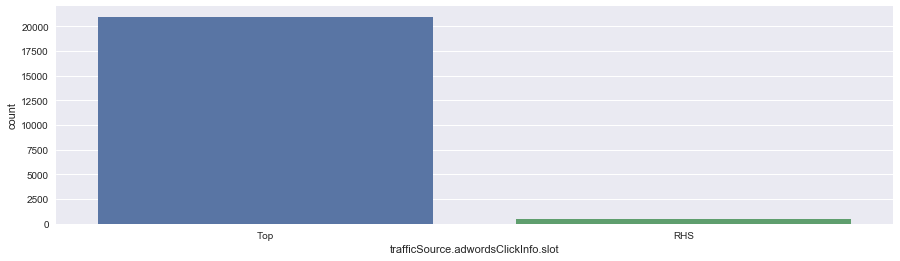

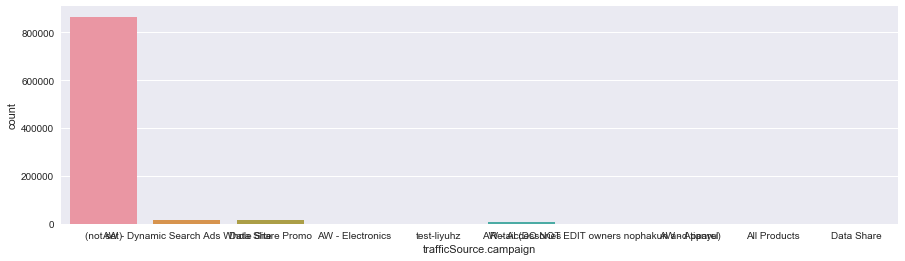

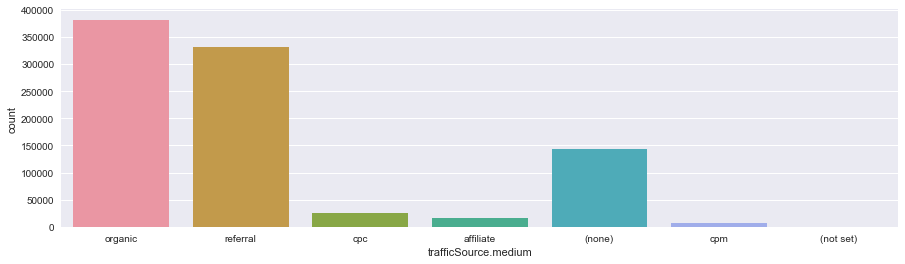

In [16]:
for i in df.columns[df.dtypes == 'O']:
    if df[i].nunique() <= 15:
        plt.figure(figsize=(15,4))
        sns.set(style="darkgrid")
        ax = sns.countplot(x=i, data=df)
        plt.show()

In [18]:
for i in df.columns[df.dtypes == 'O']:
    if df[i].nunique() > 15:
        print(i,df[i].nunique())

fullVisitorId 714167
sessionId 902755
device.browser 54
device.operatingSystem 20
geoNetwork.city 649
geoNetwork.country 222
geoNetwork.metro 94
geoNetwork.networkDomain 28064
geoNetwork.region 376
geoNetwork.subContinent 23
totals.hits 274
totals.pageviews 213
totals.transactionRevenue 5332
trafficSource.adContent 44
trafficSource.adwordsClickInfo.gclId 17774
trafficSource.keyword 3659
trafficSource.referralPath 1475
trafficSource.source 380


In [91]:
df=df.drop(['fullVisitorId','sessionId'],axis=1)
df=df.drop(['trafficSource.adwordsClickInfo.gclId'],axis=1)

KeyError: "labels ['fullVisitorId' 'sessionId'] not contained in axis"

In [ ]:
df=df.drop(['trafficSource.adwordsClickInfo.gclId'],axis=1)


In [93]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['geoNetwork.networkDomain']=enc.fit_transform(df['geoNetwork.networkDomain'])

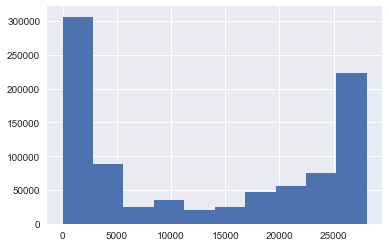

In [94]:
df['geoNetwork.networkDomain'].hist()

# Converting number columns to numeric type

In [95]:
for i in df.columns:
    if 'total' in i:
        df[i]=pd.to_numeric(df[i])
    

In [96]:
df=df.drop(['visitId','visitNumber','visitStartTime'],axis=1)
df.describe()

,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.transactionRevenue,day,month
count,903653.000000,903653.000000,903553.000000,1.151500e+04,903653.000000,903653.000000
mean,12578.873023,4.596538,3.849764,1.337448e+08,2.735183,6.987671
std,11024.723154,9.641437,7.025274,4.482852e+08,1.929072,3.484576
min,0.000000,1.000000,1.000000,1.000000e+04,0.000000,1.000000
25%,0.000000,1.000000,1.000000,2.493000e+07,1.000000,4.000000
50%,10714.000000,2.000000,1.000000,4.945000e+07,3.000000,7.000000
75%,24939.000000,4.000000,4.000000,1.076550e+08,4.000000,10.000000
max,28063.000000,500.000000,469.000000,2.312950e+10,6.000000,12.000000


In [97]:
df[['totals.pageviews','totals.transactionRevenue']]=df[['totals.pageviews','totals.transactionRevenue']].fillna(0)

In [98]:
for i in df.columns:
    if df[i].dtype=='O':
        print(i,df[i].dtype)       

channelGrouping object
device.browser object
device.deviceCategory object
device.operatingSystem object
geoNetwork.city object
geoNetwork.continent object
geoNetwork.country object
geoNetwork.metro object
geoNetwork.region object
geoNetwork.subContinent object
trafficSource.adContent object
trafficSource.adwordsClickInfo.adNetworkType object
trafficSource.adwordsClickInfo.page object
trafficSource.adwordsClickInfo.slot object
trafficSource.campaign object
trafficSource.keyword object
trafficSource.medium object
trafficSource.referralPath object
trafficSource.source object


# Missing Values replacement

In [99]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        df[i]=df[i].fillna('0')

# Missing Value Analysis

Percentage of missing values in each variable.Dropping Variable which don't have data atleast 15%

Replacing Target Variable missing Values with zero

In [82]:
df['totals.transactionRevenue']=df['totals.transactionRevenue'].fillna(0)

# Dropping Variables

In [93]:
df=df.drop(['trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaignCode'],axis=1)

In [94]:
df.isnull().sum()*100/df.shape[0]

channelGrouping                                       0.000000
date                                                  0.000000
fullVisitorId                                         0.000000
sessionId                                             0.000000
socialEngagementType                                  0.000000
visitId                                               0.000000
visitNumber                                           0.000000
visitStartTime                                        0.000000
device.browser                                        0.000000
device.browserSize                                    0.000000
device.browserVersion                                 0.000000
device.deviceCategory                                 0.000000
device.flashVersion                                   0.000000
device.isMobile                                       0.000000
device.language                                       0.000000
device.mobileDeviceBranding                           0

# Imputing for missing values

In [96]:
missing_vals=df.isnull().sum()*100/df.shape[0]
missing_vals[missing_vals>0].index

Index(['totals.bounces', 'totals.newVisits', 'totals.pageviews',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.referralPath'],
      dtype='object')

# Total Bounces

In [98]:
df['totals.bounces'].unique()
df['totals.bounces']=df['totals.bounces'].fillna(0)

In [100]:
df['totals.newVisits']=df['totals.newVisits'].fillna(0)

In [105]:
df=df[df['totals.pageviews'].notnull()]

In [111]:
df['trafficSource.isTrueDirect']=df['trafficSource.isTrueDirect'].astype('bool')
df['trafficSource.isTrueDirect'].isnull().sum()

0

In [121]:
df['trafficSource.keyword']=df['trafficSource.keyword'].fillna('(not provided)')
df.groupby(['trafficSource.keyword']).agg('count')
df=df.drop(['trafficSource.keyword'],axis=1)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.medium,trafficSource.referralPath,trafficSource.source,day,month
trafficSource.keyword,,,,,,,,,,,,,,,,,,,,,
"""google store"" refund cancel order -app",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
"""me to we"" tee",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
"""waterproof backpack""",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
"""waze mobile phone vent mount""",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
"""youtube""",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
&#1496;&#1501;&#1493; &#1488;&#1493;&#1504;&#1511;,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
(/google+redesign/shop+by+brand/youtube,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
(Remarketing/Content targeting),2297,2297,2297,2297,2297,2297,2297,2297,2297,2297,...,2297,2297,2297,2297,2297,2297,0,2297,2297,2297
(User vertical targeting),489,489,489,489,489,489,489,489,489,489,...,489,489,489,489,489,489,0,489,489,489


2.Channel Grouping

In [124]:
869193/df.shape[0]

0.9619723469458903

In [7]:
df.channelGrouping.unique()

array(['Organic Search', 'Referral', 'Paid Search', 'Affiliates',
       'Direct', 'Display', 'Social', '(Other)'], dtype=object)

In [7]:
df['totals.transactionRevenue']=pd.to_numeric(df['totals.transactionRevenue'])

In [9]:
df=df[df['totals.transactionRevenue'] >0]

C:\Users\maz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


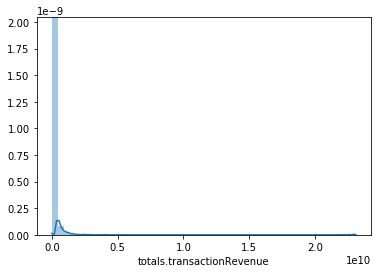

In [11]:
#histogram
sbn.distplot(df['totals.transactionRevenue'])

Deviate from the normal distribution.

Have appreciable positive skewness.

Show peakedness.

In [12]:
#skewness and kurtosis
print("Skewness: %f" % df['totals.transactionRevenue'].skew())
print("Kurtosis: %f" % df['totals.transactionRevenue'].kurt())

Skewness: 25.722703
Kurtosis: 1020.306806


# Removing Outlier

In [39]:
np.percentile(df['totals.transactionRevenue'],0.5)

1990000.0

In [43]:
dfnew=df[df['totals.transactionRevenue']<np.mean(df['totals.transactionRevenue'])+3*np.std(df['totals.transactionRevenue'])]

C:\Users\maz\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


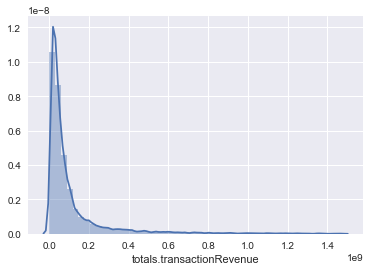

In [44]:
sbn.distplot(dfnew['totals.transactionRevenue'])

# Categorical Data Visualization

In [131]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue

In [140]:
data.dtypes

totals.transactionRevenue    object
geoNetwork.continent         object
dtype: object

In [67]:
df['device.browser']=enc.fit_transform(df['device.browser'])

In [135]:
df=df.dropna()
var = 'geoNetwork.continent'
data = pd.concat([df['totals.transactionRevenue'], df[var]], axis=1)


# One Hot encoding of variables

In [52]:
df=df.dropna(axis=1,thresh=1).dropna()

In [54]:
X=df[['channelGrouping',      'socialEngagementType', 
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 
       'totals.hits', 'totals.newVisits', 'totals.pageviews', 'totals.visits', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.criteriaParameters',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
'trafficSource.isTrueDirect',
       'trafficSource.keyword', 'trafficSource.medium',
       'trafficSource.referralPath', 'trafficSource.source']]
y=pd.to_numeric(df['totals.transactionRevenue'])

In [82]:
df['trafficSource.adContent'].unique()

array([0, 'Full auto ad IMAGE ONLY', 'First Full Auto Template Test Ad',
       '{KeyWord:Google Brand Items}', 'Display Ad created 3/11/14',
       'Ad from 11/7/16', 'Display Ad created 3/11/15',
       'Ad from 12/13/16', 'Ad from 11/3/16', 'Google Online Store',
       'Google Merchandise Collection', '{KeyWord:Want Google Stickers?}',
       '{KeyWord:Google Merchandise}', 'Display Ad created 11/17/14',
       '{KeyWord:Google Drinkware}', "{KeyWord:Google Men's T-Shirts}",
       '{KeyWord:Google Branded Gear}',
       '{KeyWord:Google Branded Apparel}', 'Google Paraphernalia',
       'Swag with Google Logos', '{KeyWord:Google Branded Kit}',
       'Want Google Sunglasses', '{KeyWord:Looking for Google Bags?}',
       'Full auto ad TEXT ONLY', 'Google Merchandise', 'google store',
       'LeEco_1a', 'Full auto ad TEXT/NATIVE',
       '{KeyWord:Want Google Pet Toys?}', 'Google Store',
       "Men's-Outerwear Google Apparel", '20% discount',
       'Full auto ad with Primary Color'

In [55]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# converting categorical data to encoded numeric

In [84]:
for i in df['trafficSource.adContent'].unique():
    print(type(i))

<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [86]:
for i in  df.columns[2:]:
    if df[i].dtype == 'O':
        for j in df[i]:
            df[j] =[str(j) for j in df[i]]
        print(i)
        df[i]=enc.fit_transform(df[i])

KeyboardInterrupt: 

In [57]:
X_cat=X[['channelGrouping', 'device.browser', 'device.deviceCategory',
       'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent'
       , 'trafficSource.campaign', 
       'trafficSource.medium', 
       'trafficSource.source']]
# Encoding the variable
fit = X_cat.apply(lambda x: enc.fit_transform(x))

# Removing columns with single values

In [112]:
drop_columns=[]
for i in X.columns:
    if X[i].nunique() ==1:
        drop_columns.append(i)

In [62]:
X.columns

Index(['channelGrouping', 'device.browser', 'device.deviceCategory',
       'device.isMobile', 'device.operatingSystem', 'geoNetwork.city',
       'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.pageviews', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.campaignCode', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source'],
      dtype='object')

In [113]:
X=X.drop(drop_columns,axis=1)

In [66]:
for i in [ 'totals.hits','totals.pageviews']:
    X[i]=pd.to_numeric(X[i])


In [70]:
X_cat.apply(lambda x : enc.fit_transform(x))

channelGrouping            NaN
device.browser             NaN
device.deviceCategory      NaN
device.isMobile            NaN
device.operatingSystem     NaN
geoNetwork.city            NaN
geoNetwork.continent       NaN
geoNetwork.country         NaN
geoNetwork.metro           NaN
geoNetwork.networkDomain   NaN
geoNetwork.region          NaN
geoNetwork.subContinent    NaN
trafficSource.campaign     NaN
trafficSource.medium       NaN
trafficSource.source       NaN
dtype: float64

In [67]:
X=pd.concat([X[[ 'totals.hits',
       'totals.pageviews']],X_cat.apply(lambda x : enc.fit_transform(x))],axis=1, join='inner')

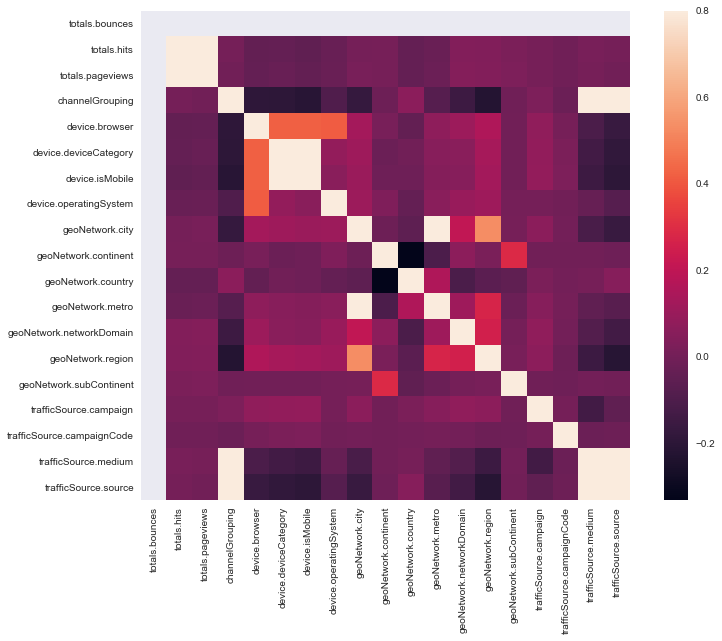

In [60]:
#correlation matrix
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sbn.heatmap(corrmat, vmax=.8, square=True);

In [29]:
X_train.columns

Index(['totals.bounces', 'totals.hits', 'totals.pageviews', 'channelGrouping',
       'device.browser', 'device.deviceCategory', 'device.isMobile',
       'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent',
       'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain',
       'geoNetwork.region', 'geoNetwork.subContinent',
       'trafficSource.campaign', 'trafficSource.campaignCode',
       'trafficSource.medium', 'trafficSource.source'],
      dtype='object')

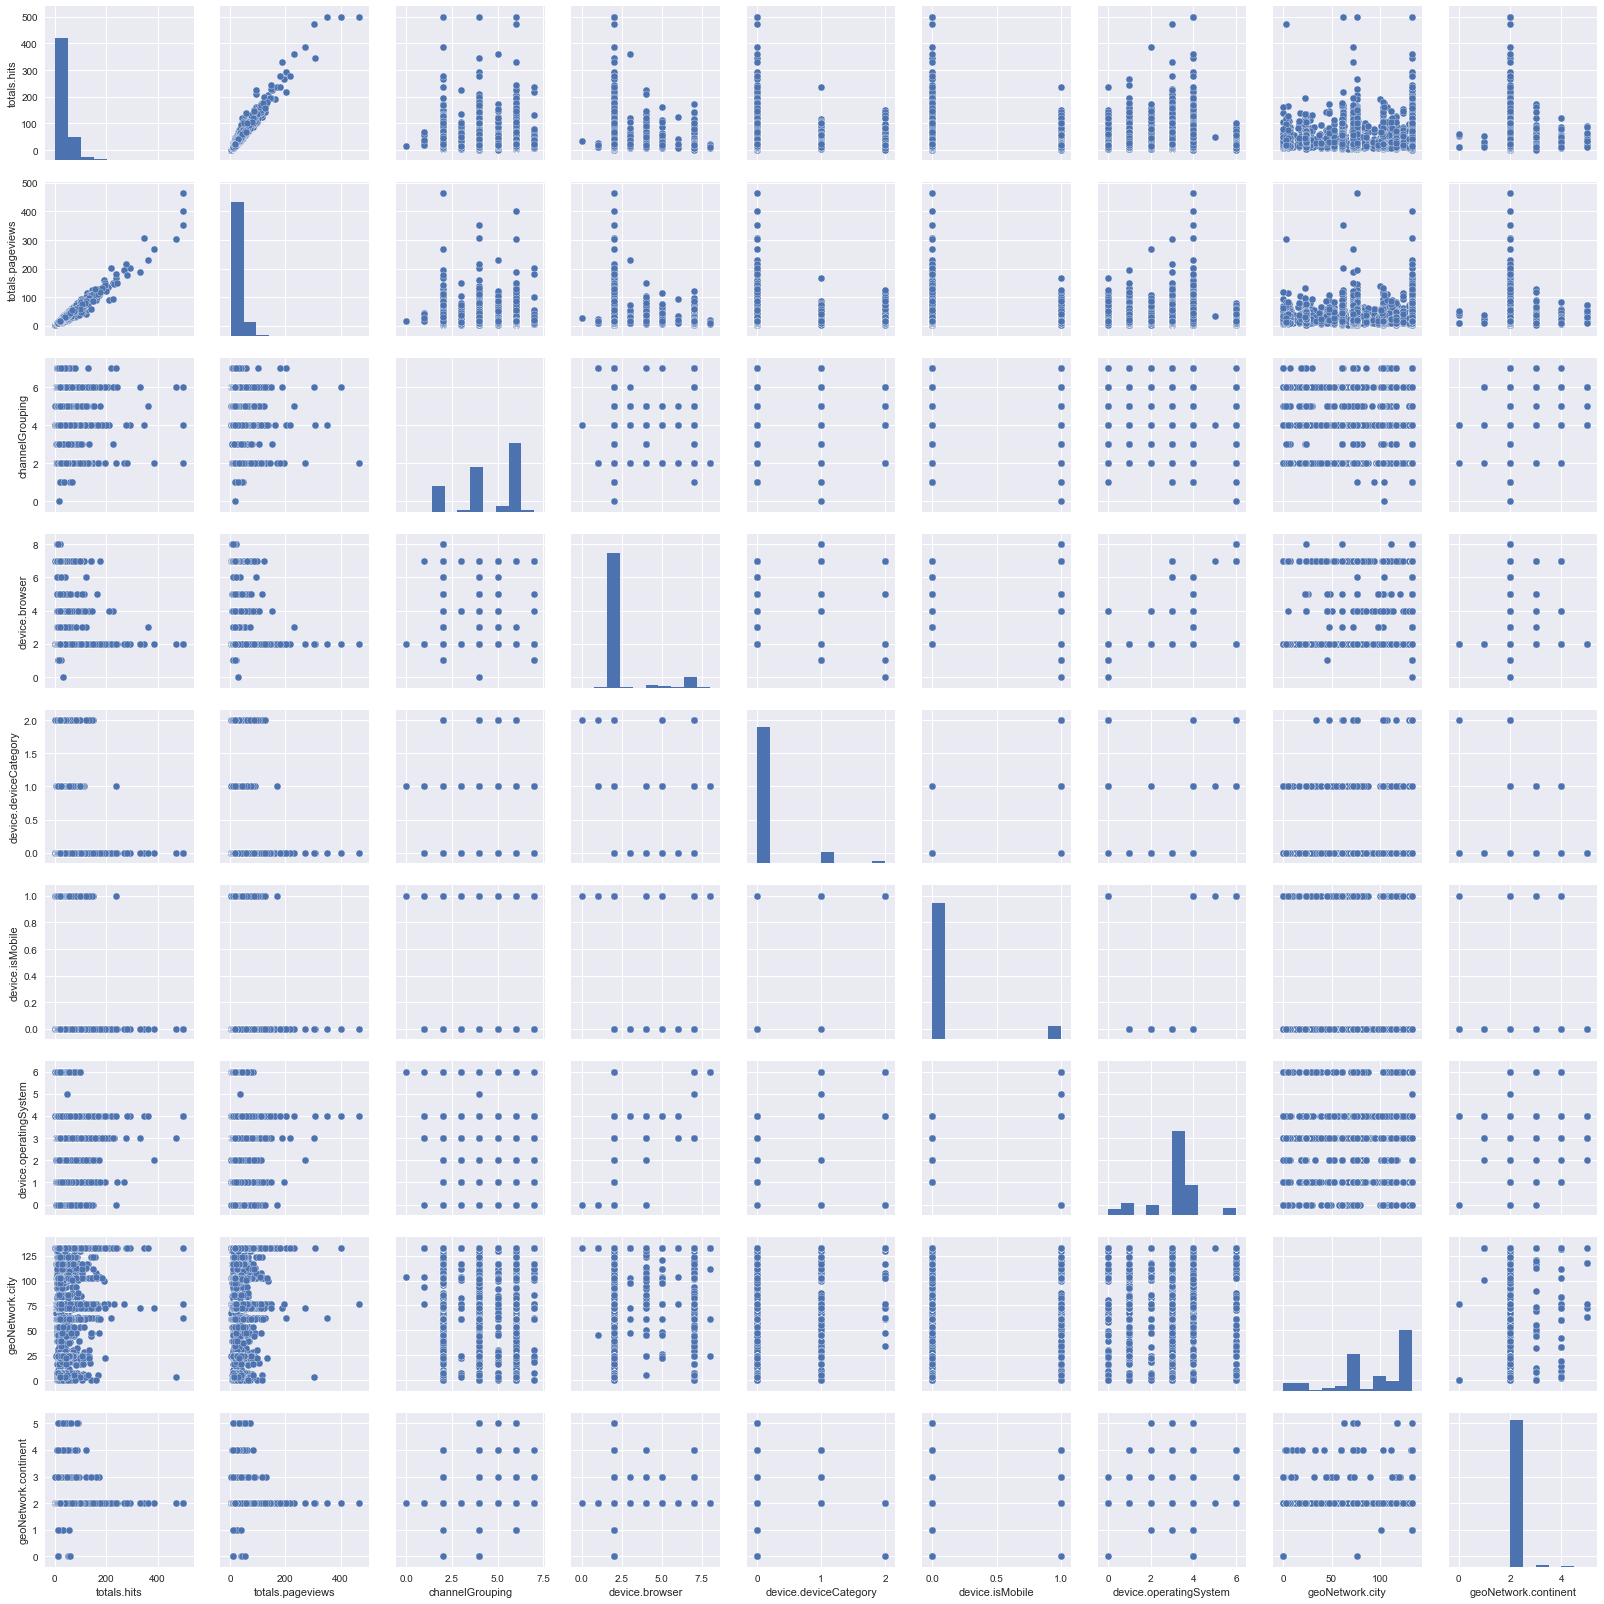

In [61]:
#scatterplot
sbn.set()
cols = ['totals.hits', 'totals.pageviews', 'channelGrouping',
       'device.browser', 'device.deviceCategory', 'device.isMobile',
       'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent']
sbn.pairplot(X_train[cols], size = 2.5)
plt.show();

# Removing Categorical objects

In [95]:
X=X.iloc[:,(X.dtypes!='object').values]

In [97]:
for col in X.columns:
    if X[col].isnull().sum() > 0:
        rate = X[col].isnull().sum() * 100 / X.shape[0]
        print(f'Column {col} has {rate:.4f}% missing values.')

Column totals.bounces has 100.0000% missing values.


In [68]:
#X=X.drop(['totals.bounces'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


totals.hits           int64
totals.pageviews      int64
0                   float64
dtype: object

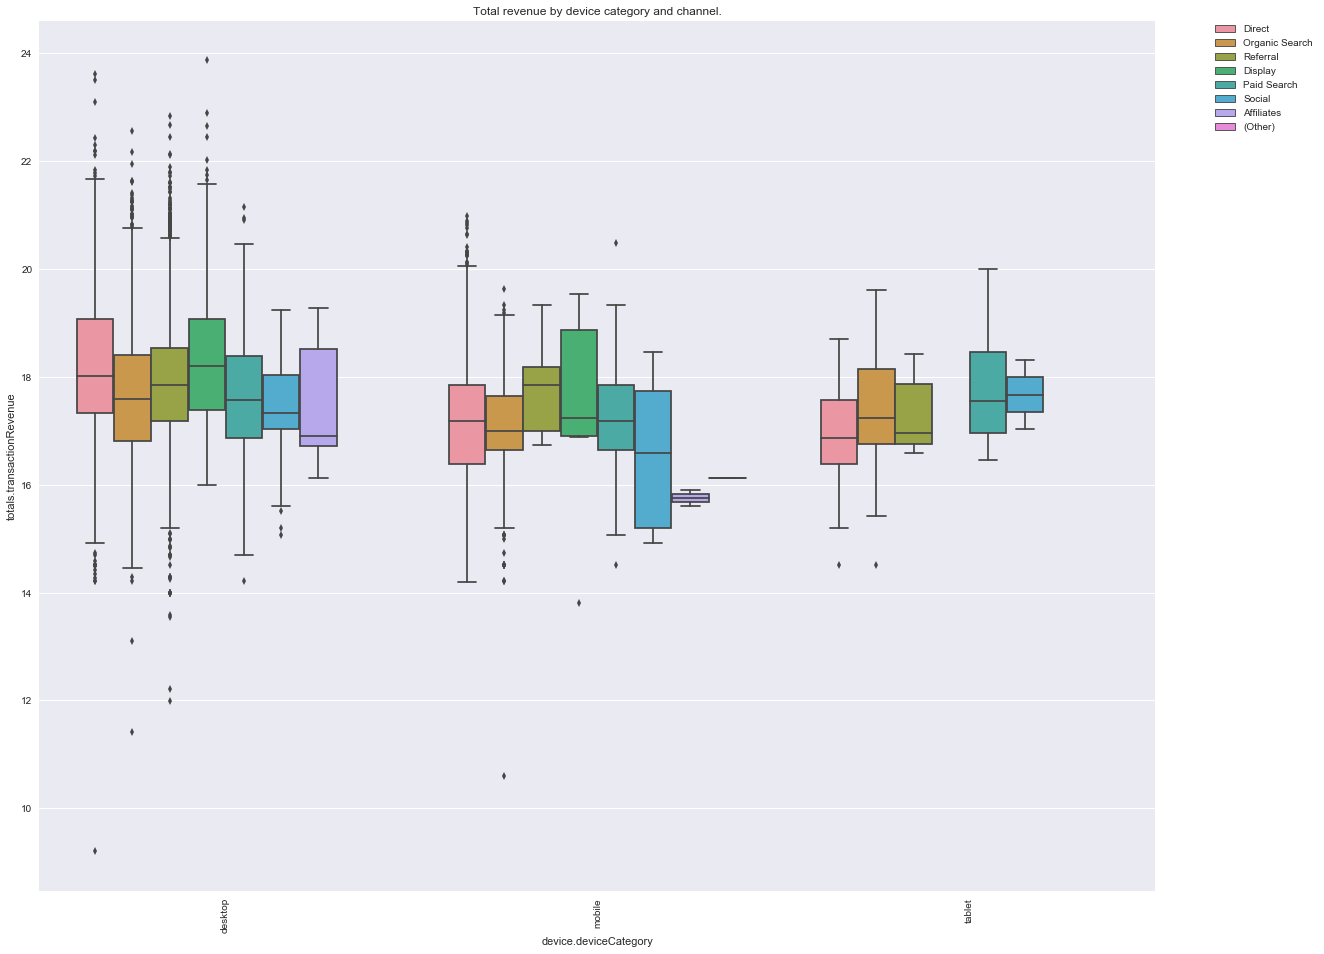

In [27]:
df1['totals.transactionRevenue'] = df1['totals.transactionRevenue'].fillna(0)
df1['totals.transactionRevenue']=df1['totals.transactionRevenue'].astype('f')
df1['totals.transactionRevenue'] = np.log1p(df1['totals.transactionRevenue'])      
sbn.set(rc={'figure.figsize':(20, 16)})
df1_ = df1.loc[df1['totals.transactionRevenue'] > 0.0]
sbn.boxplot(x="device.deviceCategory", y="totals.transactionRevenue", hue="channelGrouping",  data=df1_)
plt.title("Total revenue by device category and channel.");
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

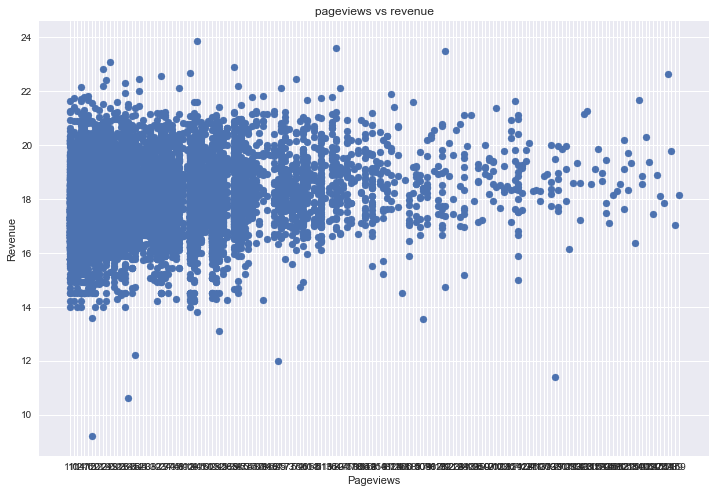

In [30]:
plt.figure(figsize=(12, 8))
plt.title('pageviews vs revenue');
plt.scatter(df1_['totals.pageviews'], df1_['totals.transactionRevenue']);
plt.xlabel('Pageviews');
plt.ylabel('Revenue');

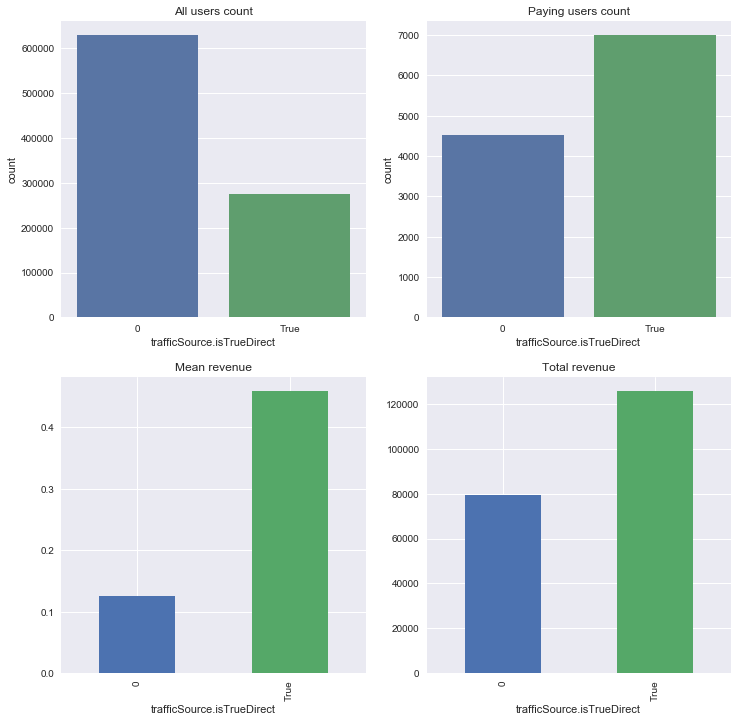

In [32]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12));
sbn.countplot('trafficSource.isTrueDirect', data=df1, ax = ax[0, 0]);
ax[0, 0].set_title('All users count');
sbn.countplot('trafficSource.isTrueDirect', data=df1_, ax = ax[0, 1]);
ax[0, 1].set_title('Paying users count');
df1.groupby('trafficSource.isTrueDirect')['totals.transactionRevenue'].mean().plot('bar', ax = ax[1, 0]);
ax[1, 0].set_title('Mean revenue');
df1.groupby('trafficSource.isTrueDirect')['totals.transactionRevenue'].sum().plot('bar', ax = ax[1, 1]);
ax[1, 1].set_title('Total revenue');

In [65]:
X.dtypes

totals.hits          object
totals.pageviews     object
0                   float64
dtype: object

# Linear Regression using Stat

In [64]:
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm



model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test) 

print_model = model.summary()
print(print_model)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Regression assumptions
Now let’s try to validate the four assumptions one by one

Linearity & Equal variance
Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

Text(0,0.5,'residuals')

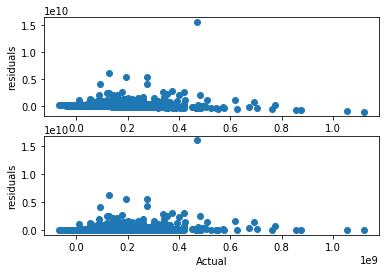

In [174]:
residual = y_test - predictions
plt.subplot(211)
plt.scatter(predictions,residual )
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.subplot(212)
plt.scatter(predictions,y_test )
plt.xlabel('Actual')
plt.ylabel('residuals')

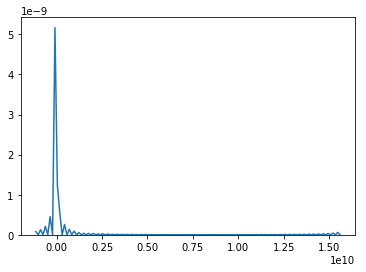

In [178]:
import seaborn as sbn
sbn.kdeplot(residual)

# Robust Linear Regression using Statsmodel

In [51]:
X_train.dropna(axis)

totals.bounces                float64
totals.hits                     int64
totals.pageviews                int64
channelGrouping                 int64
device.browser                  int64
device.deviceCategory           int64
device.isMobile                 int64
device.operatingSystem          int64
geoNetwork.city                 int64
geoNetwork.continent            int64
geoNetwork.country              int64
geoNetwork.metro                int64
geoNetwork.networkDomain        int64
geoNetwork.region               int64
geoNetwork.subContinent         int64
trafficSource.campaign          int64
trafficSource.campaignCode      int64
trafficSource.medium            int64
trafficSource.source            int64
dtype: object

In [48]:
# Fit model and print summary
rlm_model = sm.RLM(X_train, y_train, M=sm.robust.norms.HuberT())

rlm_results = rlm_model.fit()

print(rlm_results.params)

C:\Users\maz\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: Invalid value encountered in median for 1 results
  r = func(a, **kwargs)


ValueError: shapes (8060,19) and (8060,19) not aligned: 19 (dim 1) != 8060 (dim 0)

# Ridge Regression

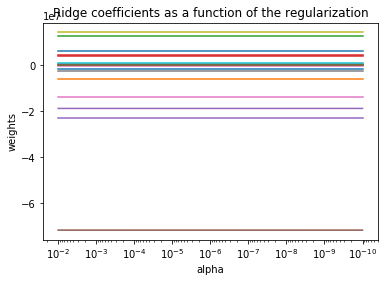

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# Ensemble Tree Methods
 

# 1.Random Forest Regression

In [186]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,max_features='sqrt')
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [202]:
prediction=rf.predict(X_test)

In [188]:
residuals=y_test-predictions

In [189]:
from sklearn import metrics

In [190]:
metrics.mean_squared_error(predictions,y_test)

1.6765879675143747e+17

In [191]:
np.mean(np.abs((y_test - predictions) / y_test)) * 100

938.7325940498342

# Random Forest Hyperparameters tuning using Randomized Search

In [218]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [219]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6, 9, 11, 14, 17, 19, 22, 24, 27, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [220]:
rf_random.best_params_

{'n_estimators': 366,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 22,
 'bootstrap': True}

In [224]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_test,y_test)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)


Model Performance
Average Error: 58986015.3401 degrees.
Accuracy = -94.52%.
Model Performance
Average Error: 126855979.9743 degrees.
Accuracy = -714.89%.


In [227]:
predictions=best_random.predict(X_test)
metrics.mean_squared_error(predictions,y_test)

1.6307504142345635e+17

# 2. Gradient Boosted Tree

In [192]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model with 1000 decision trees
gbr = GradientBoostingRegressor(n_estimators = 1000, random_state = 42,max_depth=8,max_features='sqrt')
# Train the model on training data
gbr.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [196]:
predictions=gbr.predict(X_test)
residuals=y_test-predictions

In [197]:
metrics.mean_squared_error(predictions,y_test)

1.8087151202430192e+17

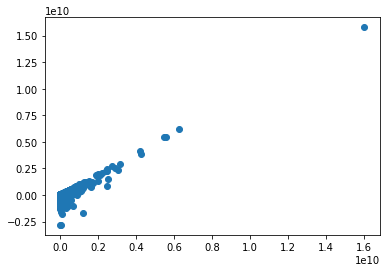

In [200]:
plt.scatter(y_test,residuals)

# Ensemble Method

In [206]:
pred1=gbr.predict(X_test)
pred2=rf.predict(X_test)
pred3=model.predict(X_test) 
pred=(pred1+pred2+pred3)/3

In [211]:
metrics.mean_squared_error(pred3,y_test)

1.6277990875121584e+17

In [ ]:
# example of training a final classification model
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y, epochs=200, verbose=0)